In [1]:
import h5py
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from keras.models import load_model
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve

In [2]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']

In [3]:
# 加载CNN模型
CNNModel = load_model('Models\\CNN.h5')

# 加载CNN数据
with h5py.File('Models\\CNNData.h5', 'r') as file:
    X_train = file['X_train'][:]
    y_train = file['y_train'][:]
    X_test = file['X_test'][:]
    y_test = file['y_test'][:]

# 使用CNN提取特征
X_train_features = CNNModel.predict(X_train)
X_test_features = CNNModel.predict(X_test)

5/5 [==============================] - 0s 66ms/step


In [4]:
# 使用SVM分类器
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1)
svm.fit(X_train_features, y_train[:,0])

SVC(C=1, gamma=2, random_state=0)

In [5]:
y_pred = svm.predict(X_test_features)
print('Accuracy: %.2f%%' % (accuracy_score(y_test[:,0], y_pred) * 100))
print(classification_report(y_test[:,0], y_pred))

Accuracy: 90.44%
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        68
         1.0       0.92      0.88      0.90        68

    accuracy                           0.90       136
   macro avg       0.91      0.90      0.90       136
weighted avg       0.91      0.90      0.90       136


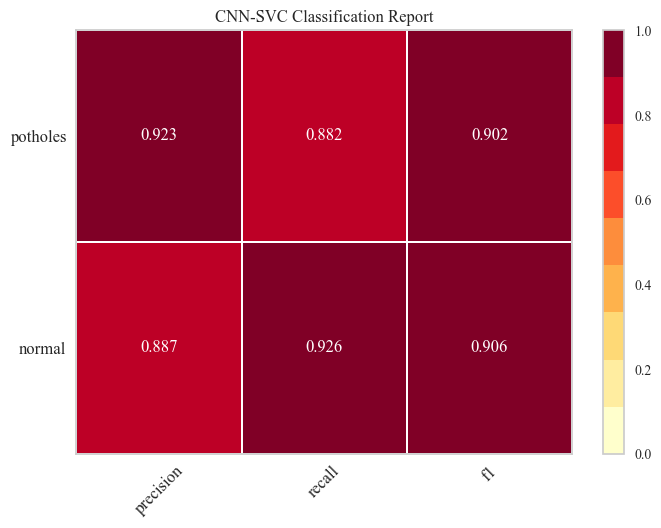

In [6]:
# 分类报告可视化
visualizer = ClassificationReport(svm, classes=['potholes', 'normal'])
visualizer.fit(X_train_features, y_train[:,0])
visualizer.score(X_test_features, y_test[:,0])
plt.title('CNN-SVC Classification Report')
plt.savefig('Figures\\[CNN-SVC]分类报告.pdf')

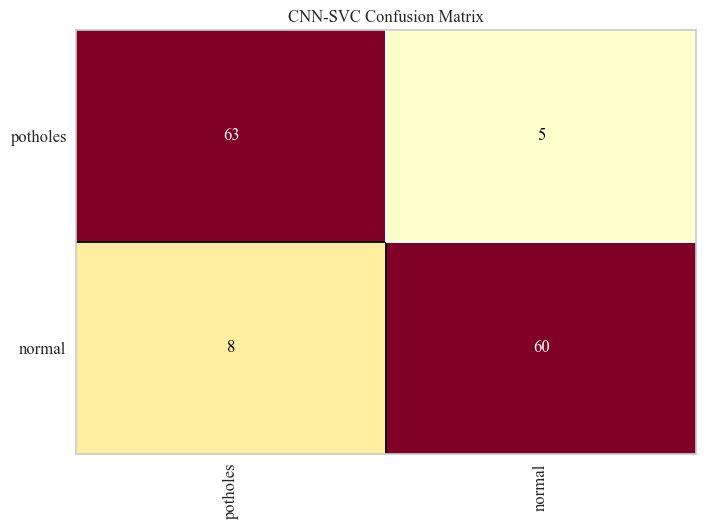

In [7]:
# yellowbrick绘制学混淆矩阵热力图
cm = ConfusionMatrix(svm, classes=['potholes', 'normal'])
cm.fit(X_train_features, y_train[:,0])
cm.score(X_test_features, y_test[:,0])
plt.title('CNN-SVC Confusion Matrix')
plt.savefig('Figures\\[CNN-SVC]混淆矩阵热力图.pdf')

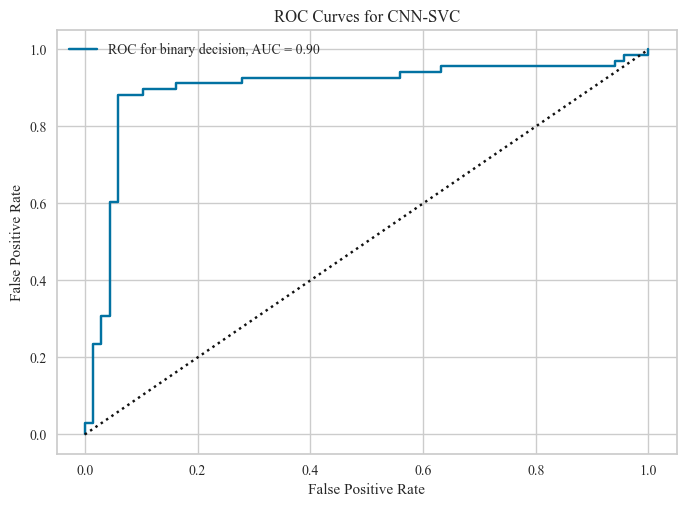

In [8]:
# yellowbrick绘制ROC曲线
visualizer = ROCAUC(svm, classes=['potholes', 'normal'], binary=True)
visualizer.fit(X_train_features, y_train[:,0])
visualizer.score(X_test_features, y_test[:,0])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curves for CNN-SVC')
plt.savefig('Figures\\[CNN-SVC]ROC曲线.pdf')

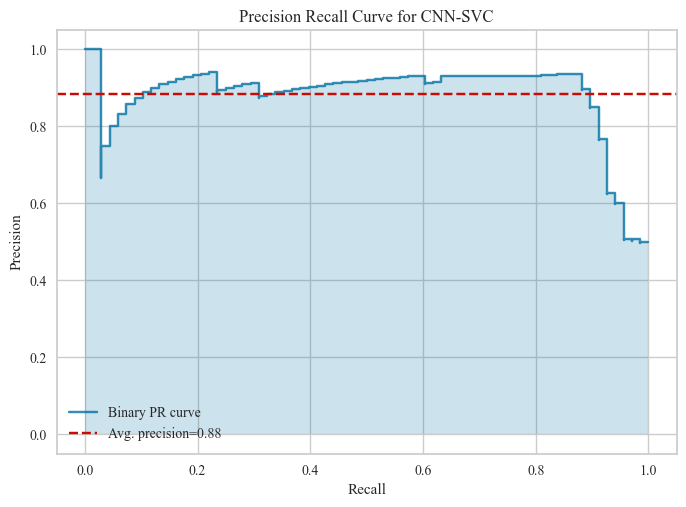

In [9]:
# yellowbrick绘制精度-召回率曲线
visualizer = PrecisionRecallCurve(svm, classes=['potholes', 'normal'])
visualizer.fit(X_train_features, y_train[:,0])
visualizer.score(X_test_features, y_test[:,0])
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for CNN-SVC')
plt.savefig('Figures\\[CNN-SVC]精确率召回率曲线.pdf')

In [10]:
# 使用五折交叉验证
scores = cross_val_score(svm, X_test_features, y_test[:,0], cv=5)
# 输出交叉验证分数
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.96428571 0.88888889 0.88888889 0.85185185 0.92592593]
Accuracy: 0.90 (+/- 0.08)


In [11]:
import pickle
with open('Models\\CNN-SVM.pkl','wb') as f:
    pickle.dump(svm, f)
f.close()